In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from pathlib import Path
import glob

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf


%matplotlib inline

In [18]:
file_path = "Resources/team_stats.csv"
team_stats = pd.read_csv(file_path, index_col = False)
team_stats.head(10)

,Year,Team,W,L,Pct,GB,WCGB,Streak,RS,RA,Dff
0,2019,NY Yankees,103,59,0.636,4.0,0.0,L2,943,739,204
1,2019,Minnesota,101,61,0.623,6.0,0.0,L1,939,754,185
2,2019,Houston,107,55,0.660,0.0,0.0,W3,920,640,280
3,2019,Boston,84,78,0.519,23.0,12.0,W1,901,828,73
4,2017,Houston,101,61,0.623,3.0,0.0,W1,896,700,196
5,2015,Toronto,93,69,0.574,7.0,0.0,L2,891,670,221
6,2019,LA Dodgers,106,56,0.654,1.0,0.0,W7,886,613,273
7,2016,Boston,93,69,0.574,10.5,0.0,L2,878,694,184
8,2018,Boston,108,54,0.667,0.0,0.0,W1,876,647,229
9,2019,Washington,93,69,0.574,14.0,4.0,W8,873,724,149


In [19]:
team_stats.dtypes

Year        int64
Team       object
W           int64
L           int64
Pct       float64
GB        float64
WCGB      float64
Streak     object
RS          int64
RA          int64
Dff         int64
dtype: object

In [22]:
team_stats_refined = team_stats.drop(columns=["Pct", "GB", "WCGB", "Streak"])
team_stats_refined.head()

,Year,Team,W,L,RS,RA,Dff
0,2019,NY Yankees,103,59,943,739,204
1,2019,Minnesota,101,61,939,754,185
2,2019,Houston,107,55,920,640,280
3,2019,Boston,84,78,901,828,73
4,2017,Houston,101,61,896,700,196


In [23]:
correlation = team_stats_refined.corr()
correlation

,Year,W,L,RS,RA,Dff
Year,1.000000e+00,0.000535,0.000537,0.462490,0.404746,1.945325e-13
W,5.350922e-04,1.000000,-0.999710,0.585763,-0.728926,9.406899e-01
L,5.368503e-04,-0.999710,1.000000,-0.584345,0.729098,-9.398806e-01
RS,4.624898e-01,0.585763,-0.584345,1.000000,0.013667,6.527184e-01
RA,4.047463e-01,-0.728926,0.729098,0.013667,1.000000,-7.486093e-01
Dff,1.945325e-13,0.940690,-0.939881,0.652718,-0.748609,1.000000e+00


<AxesSubplot:>

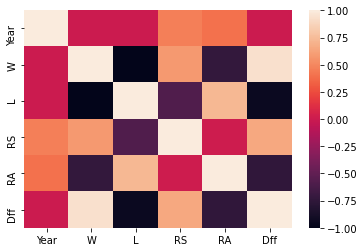

In [24]:
sns.heatmap(correlation, vmin=-1, vmax=1)

<AxesSubplot:xlabel='Dff', ylabel='W'>

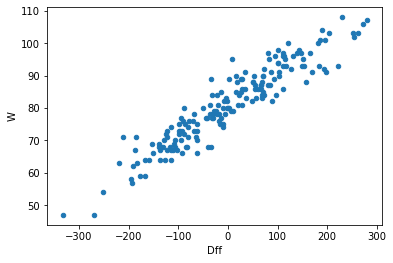

In [28]:
team_stats_refined.plot(kind='scatter', x='Dff', y='W')